# Linear Regression on Weather dataset

*   Akshay Bankar(2019201011)

## Import libraries

In [0]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.utils import check_array
import matplotlib.pyplot as plt

## Linear rgression class definition

Stochastic gradient descent

**Cost Function:-**

We need to minimize the cost function:

$ J(θ_1,θ_2)=(1/2m) ∑(h_0 x(i)−y(i))^2 $

Now we calculate the derivatives and have:

$ \frac{∂} {∂θ} J(θ_0,θ_1)=(1/m) ∑(h_θ(x(i))−y(i)) $ 

New theta will be:

$ θ_i = θ_i − α \frac{∂} {∂θ_i} J(θ_0,θ_1) $


In [0]:
class linear_regression:
    def __init__(self, learn_rate, iters, train, test, train_label, test_label):#, wts):
        self.b = 0
        self.m = np.array([0]*len(train[0]))
        self.feature_size = len(train[0])
        self.learning_rate = learn_rate
        self.num_iters = iters
        self.train_data = np.array(train)
        self.train_op = np.array(train_label)
        self.test_data = np.array(test)
        self.test_op = np.array(test_label)

    def compute_error(self, data, data_op):
        total_error = 0
        for i in range(data):
            total_error += (data_op - (np.dot(self.m,data[i])+b))**2
        return total_error
    
    def gradient_descent(self):
      '''
        self.train_data = np.array(self.train_data)
        self.train_op = np.array(self.train_op)
        for i in range(self.num_iters):
            m_tmp = self.m
            b_tmp = self.b
            dotprod = np.dot(self.train_data, m_tmp)
            tmp = (self.learning_rate*( dotprod + np.array(b_tmp - self.train_op)))/len(self.train_data)
            for j in range(len(self.train_data)):
                #for k in range(self.feature_size):
                self.m = m_tmp - tmp[j]*self.train_data[j]
                self.b = b_tmp - tmp[j]
        '''
        self.train_data = np.array(self.train_data)
        self.train_op = np.array(self.train_op)
        for i in range(self.num_iters):
            for j in range(len(self.train_data)):
                self.stoch_grad(self.train_data[j], self.train_op[j], len(self.train_data))
        #print(self.m)
        #print(self.b)
        
    def stoch_grad(self, data_row, data_op, train_size):
        m_tmp = self.m
        b_tmp = self.b
        dotprod = [a*b for a,b in zip(m_tmp,data_row)]
        dotprod = np.sum(dotprod)
        tmp = (self.learning_rate*( dotprod + b_tmp - data_op))/train_size
        for k in range(self.feature_size):
            self.m[k] = m_tmp[k] - tmp*data_row[k]
        self.b = b_tmp - tmp
            
    def test(self):
        self.test_data = list(self.test_data)
        self.test_op = list(self.test_op)
        predict_op = []
        
        for i in range(len(self.test_data)):
            dotprod = [a*b for a,b in zip(self.m,self.test_data[i])]
            dotprod = np.sum(dotprod)
            pred = (dotprod+self.b)
            #print(pred)
            predict_op.append(pred)
        return predict_op

## Data preprocessing


*   **Categorical data** : Identify categorical data to perform one-hot encoding.
*   **Drop attributes** : The 'Formatted Date'and 'Daily Summary' attributes do not help much in finding  Apparent Temperature (C).


In [27]:
df = pd.read_csv('/content/drive/My Drive/SMAI/Assignment-2/q4/weather/weather.csv')
attribute_list = ['Summary',	'Precip Type', 	'Temperature (C)', 	'Apparent Temperature (C)', 	'Humidity', 	'Wind Speed (km/h)',
 	                'Wind Bearing (degrees)', 	'Visibility (km)', 	'Pressure (millibars)']
categorical_list = ['Summary',	'Precip Type',]
drop_list = ['Formatted Date', 'Daily Summary']
df.drop(drop_list, axis='columns', inplace=True)
df.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51




*   **Null values** : Identify samples with null values in any of the attribute and remove them if they are very less percentage of overall data size.


In [28]:
print(df['Summary'].shape)
df.isnull().sum()

(77285,)


Summary                       0
Precip Type                 404
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Pressure (millibars)          0
dtype: int64

In [29]:
df = df.dropna(how='any',axis=0)
df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76881 entries, 0 to 77284
Data columns (total 9 columns):
Summary                     76881 non-null object
Precip Type                 76881 non-null object
Temperature (C)             76881 non-null float64
Apparent Temperature (C)    76881 non-null float64
Humidity                    76881 non-null float64
Wind Speed (km/h)           76881 non-null float64
Wind Bearing (degrees)      76881 non-null int64
Visibility (km)             76881 non-null float64
Pressure (millibars)        76881 non-null float64
dtypes: float64(6), int64(1), object(2)
memory usage: 5.9+ MB




*   **Find unique values in categorical data to perform one-hot encoding.**



In [30]:
for attr in categorical_list:
    print(df[attr].unique())

['Partly Cloudy' 'Mostly Cloudy' 'Overcast' 'Foggy'
 'Breezy and Mostly Cloudy' 'Clear' 'Breezy and Partly Cloudy'
 'Breezy and Overcast' 'Humid and Mostly Cloudy' 'Humid and Partly Cloudy'
 'Windy and Foggy' 'Windy and Overcast' 'Breezy and Foggy' 'Breezy'
 'Dry and Partly Cloudy' 'Windy and Partly Cloudy'
 'Windy and Mostly Cloudy' 'Dangerously Windy and Partly Cloudy' 'Dry'
 'Windy' 'Humid and Overcast' 'Light Rain' 'Drizzle'
 'Dry and Mostly Cloudy' 'Breezy and Dry' 'Rain']
['rain' 'snow']


In [0]:
cat_col_attributes = [['Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Foggy',
                        'Breezy and Mostly Cloudy', 'Clear', 'Breezy and Partly Cloudy',
                        'Breezy and Overcast', 'Humid and Mostly Cloudy', 'Humid and Partly Cloudy',
                        'Windy and Foggy', 'Windy and Overcast', 'Breezy and Foggy', 'Breezy',
                        'Dry and Partly Cloudy', 'Windy and Partly Cloudy',
                        'Windy and Mostly Cloudy', 'Dangerously Windy and Partly Cloudy', 'Dry',
                        'Windy', 'Humid and Overcast', 'Light Rain', 'Drizzle',
                        'Dry and Mostly Cloudy', 'Breezy and Dry', 'Rain'],
                        ['rain', 'snow']]
for i in range(0,len(categorical_list)):
    df[categorical_list[i]] = pd.Categorical(df[categorical_list[i]],categories = cat_col_attributes[i])

In [0]:
df = pd.get_dummies(df)

In [0]:
data_op = df['Apparent Temperature (C)']
data_op = data_op.to_numpy()
df = df.drop(columns=['Apparent Temperature (C)'])
df_np = df.to_numpy()


## Performance of different error functions and behaviour of the regression coefficients
*   Split data into train and test.
*   Find error values of different error functions with differnt regression coeffients (weights) values and plot their behaviour.





In [48]:
X_train, X_test, y_train, y_test = train_test_split(df_np, data_op, test_size=0.20)

iterations = [10, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
pred = []
for iter in iterations:
    lin_reg = linear_regression(learn_rate = 0.01, iters = iter, train = X_train, test = X_test,
                            train_label = y_train, test_label = y_test)#, wts = [0]*len(X_train[0]))
    lin_reg.gradient_descent()
    pred.append(lin_reg.test())
    print(iter, end='\t')

10	50	100	200	300	400	500	600	700	800	900	1000	



*   **Performance of different error functions**



Errors for  10  iterations :
Mean-Square-error :  128.87783300359766
R2 score :  -0.12898599292674962
Mean-absolute-error :  9.270428908468455
Errors for  50  iterations :
Mean-Square-error :  150.68454356154078
R2 score :  -0.3200155144352188
Mean-absolute-error :  9.897850039384375
Errors for  100  iterations :
Mean-Square-error :  150.69365728897748
R2 score :  -0.32009535183145355
Mean-absolute-error :  9.898122655741913
Errors for  200  iterations :
Mean-Square-error :  150.69365770623276
R2 score :  -0.3200953554866621
Mean-absolute-error :  9.898122668223568
Errors for  300  iterations :
Mean-Square-error :  150.69365770623276
R2 score :  -0.3200953554866621
Mean-absolute-error :  9.898122668223568
Errors for  400  iterations :
Mean-Square-error :  150.69365770623276
R2 score :  -0.3200953554866621
Mean-absolute-error :  9.898122668223568
Errors for  500  iterations :
Mean-Square-error :  150.69365770623276
R2 score :  -0.3200953554866621
Mean-absolute-error :  9.898122668223568

AttributeError: ignored

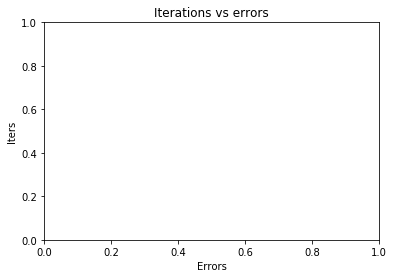

In [59]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = check_array(y_true, y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

fig, ax = plt.subplots()
ax.set_xlabel("Errors")
ax.set_ylabel("Iters")
ax.set_title("Iterations vs errors")


mse = []
mae = []
mape = []
for i in range(len(iterations)):
    print("Errors for ",iterations[i]," iterations :")
    print ("Mean-Square-error : ", mean_squared_error(y_test, pred[i]))
    mse.append(mean_squared_error(y_test, pred[i]))
    print ("R2 score : ", r2_score(y_test, pred[i]))
    print("Mean-absolute-error : ", mean_absolute_error(y_test, pred[i]))
    mae.append(mean_absolute_error(y_test, pred[i]))
    #print("Mean-absolute-percentage-error : ", mean_absolute_percentage_error(y_test, pred[i]))
    #mape.append(mean_absolute_percentage_error(y_test, pred[i]))
ax.plt(iterations, mse, label="MSE", c="red")
ax.plt(iterations, mae, label="MAE", c = "green")
ax.plt(iterations, mape, label="MAPE", c= "blue")
plt.show()



*   **Behaviour of the regression coefficients**



In [0]:
weights = [[np.random.uniform(-10,0, np.shape(X_train[0]))], [np.random.uniform(0,1, np.shape(X_train[0]))], [np.random.uniform(1,10, np.shape(X_train[0]))]]
iterations = [10, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
mse = []
mae = []
mape = []
fig, ax = plt.subplots()
ax.set_xlabel("Errors")
ax.set_ylabel("Iters")
ax.set_title("Iterations vs Different weights")
ax.plot(iterations, mse)
print("Errors for different weights:")
for i in range(3):
    mse = []
    mae = []
    mape = []
    for iter in iterations:
        lin_reg = linear_regression(learn_rate = 0.01, iters = iter, train = X_train, test = X_test,
                                train_label = y_train, test_label = y_test, wts = weights[i])
        lin_reg.gradient_descent()
        pred.append(lin_reg.test())
        print ("Mean-Square-error : ", mean_squared_error(y_test, pred[i]))
        mse.append(mean_squared_error(y_test, pred[i])
        print ("R2 score : ", r2_score(y_test, pred[i]))
        print("Mean-absolute-error : ", mean_absolute_error(y_test, pred[i]))
        mae.append(mean_absolute_error(y_test, pred[i])
        print("Mean-absolute-percentage-error : ", mean_absolute_percentage_error(y_test, pred[i]))
        mape.append(mean_absolute_percentage_error(y_test, pred[i])

    ax.plot(iterations, mse, c= color[i], label = "mse")
    plt.show()
    mse_weights.append(mse)